# <center><font color = 'blue'>*ADRIS MISRA*</font></center>

**Github repository:** https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-adris-misra

# `Project - Concrete Strength Prediction`

### `Objective:`
To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain 85% to 95% accuracy.

### `Domain:` 
- Construction

### `Resources Available`
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.

### `Learning Outcomes:`
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using regression models
- Feature Selection, Model Selection and Tuning for model performance improvement
- Model evaluation

### `Attribute Information:`

Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

| ID | Name                                    | Data Type    | Measurement        | Description     |
|----|-----------------------------------------|--------------|--------------------|-----------------|
| 1  | Cement (cement)                         | quantitative | kg in a m3 mixture | Input Variable  |
| 2  | Blast Furnace Slag (slag)               | quantitative | kg in a m3 mixture | Input Variable  |
| 3  | Fly Ash (ash)                           | quantitative | kg in a m3 mixture | Input Variable  |
| 4  | Water(water)                            | quantitative | kg in a m3 mixture | Input Variable  |
| 5  | Superplasticizer (superplastic)         | quantitative | kg in a m3 mixture | Input Variable  |
| 6  | Coarse Aggregate (coarseagg)            | quantitative | kg in a m3 mixture | Input Variable  |
| 7  | Fine Aggregate (fineagg)                | quantitative | kg in a m3 mixture | Input Variable  |
| 8  | Age(age)                                | quantitative | Day (1~365)        | Input Variable  |
| 9  | Concrete compressive strength(strength) | quantitative | MPa                | Output Variable |

### Exploratory Data Quality Report Reflecting the Following:
1. Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/ tails, missing values, outliers, duplicates(10 Marks)
2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 marks)
3. Feature Engineering techniques(10 marks)
   - Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.
   - Get the data model ready and do a train test split.
   - Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.
   
### Creating the Model and Tuning It:
1. Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 marks)
2. Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation

In [2]:
# Import warnings to suppress runtime warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import basic libraries for data and visualization

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [63]:
# Import models and relevent class / functions

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [4]:
# Import data

concrete = pd.read_csv("concrete.csv")

In [5]:
# checking sample head data

concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [6]:
# checking sample tail data

concrete.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [7]:
# shape of dataframe

concrete.shape

(1030, 9)

In [8]:
# Checking data type

concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
# Check for Missing Values

concrete.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [10]:
# check basic stats

concrete.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [11]:
# Finding all duplicate rows and adding a dup column to find count

dup_concrete = concrete[concrete.duplicated(keep=False)]
dup_concrete['dup'] = 1
dup_concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,dup
27,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20,1
49,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40,1
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30,1
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90,1
96,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30,1
190,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30,1
245,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30,1
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40,1
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40,1
333,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69,1


In [12]:
dup_concrete.shape

(36, 10)

In [13]:
# finding count of duplicate for each combinations

dup_concrete.groupby(list(dup_concrete.columns[:-1]), as_index=False).count()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,dup
0,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69,2
1,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30,4
2,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90,3
3,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30,4
4,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30,4
5,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30,4
6,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40,3
7,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20,3
8,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29,3
9,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30,3


In [14]:
# Count of 0 in each column

(concrete == 0).sum(axis=0)

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

<font color='green'>**Preliminary data analysis:** 
- There are 1030 rows and 9 columns in the dataset
- There is no null or missing value in any of the columns
- There are some "0" values that need further investigation and replaced if appropriate
- All the attributes are numerical
- slag, ash, superplastic and age seems to be very skewed, might need transformation and scaling
- There are 36 duplicate rows with 11 distinct combinations, so 25 are true duplicates and need treatment
</font>

In [15]:
# Deleteing duplicates before EDA

concrete.drop_duplicates(keep='first', inplace=True)

In [17]:
# Check revised shape
# Original shape had 1030 rows, that confirms 25 rows got deleted

concrete.shape

(1005, 9)

In [17]:
# Checking the 11 combinations of duplicates are still there in modified dataframe

concrete[concrete.index.isin(dup_concrete.index)]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
27,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
49,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
96,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
190,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
245,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
333,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
392,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
433,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


### 2. EDA: Study the data distribution in each attribute and target variable

In [18]:
# Number of unique in each column

concrete.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [19]:
# Check for Skew for all variables

concrete.skew().sort_values(ascending=False)

age             3.253974
superplastic    0.980604
slag            0.855225
cement          0.564959
ash             0.497231
strength        0.395696
water           0.034433
coarseagg      -0.065256
fineagg        -0.252353
dtype: float64

In [20]:
# Check for Kurt for all variables

concrete.kurt().sort_values(ascending=False)

age             11.961963
superplastic     1.695396
water            0.167329
fineagg         -0.105881
strength        -0.305309
slag            -0.407179
cement          -0.432458
coarseagg       -0.583049
ash             -1.366694
dtype: float64

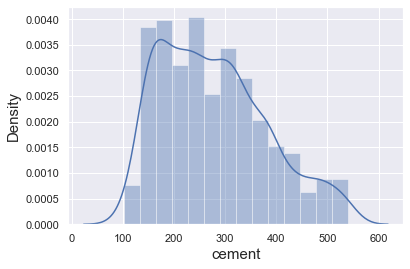

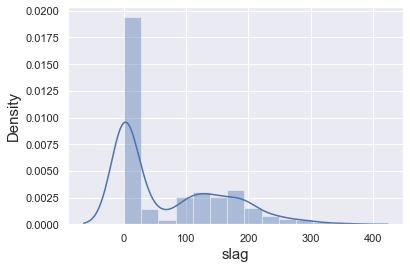

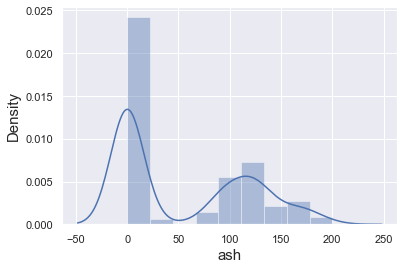

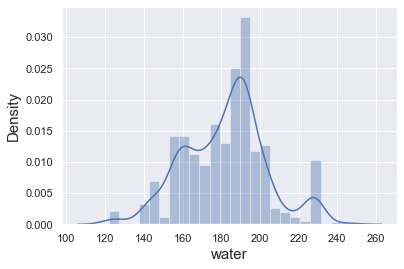

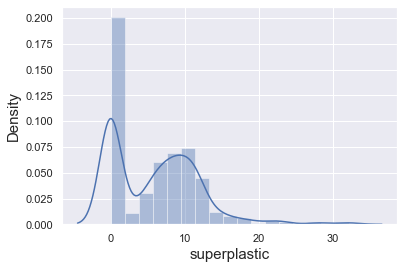

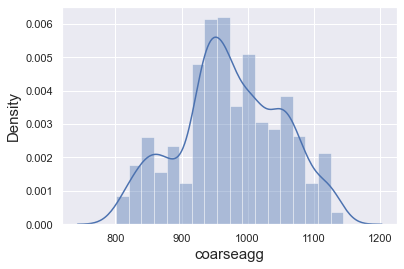

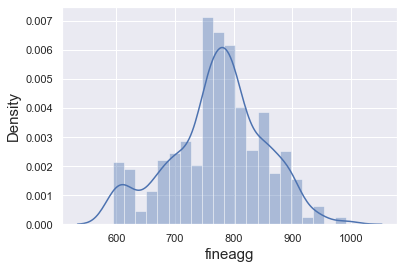

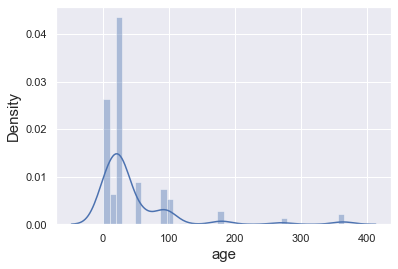

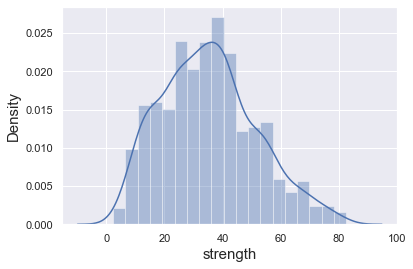

In [21]:
# continues columns plot

for col in concrete.columns:
    sns.distplot(x=concrete[col]);
    plt.xlabel(col,size=15);
    plt.ylabel('Density',size=15);
    plt.show();

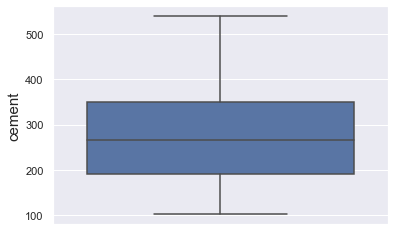

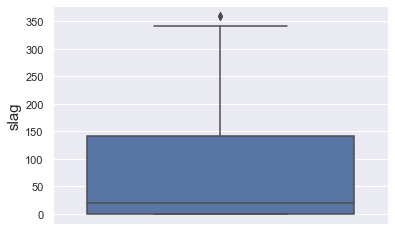

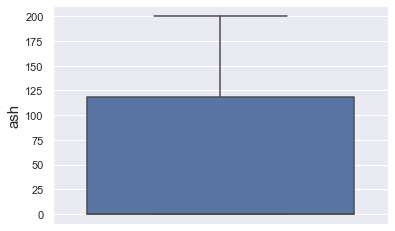

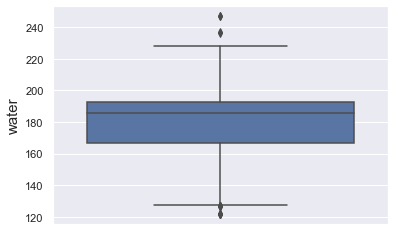

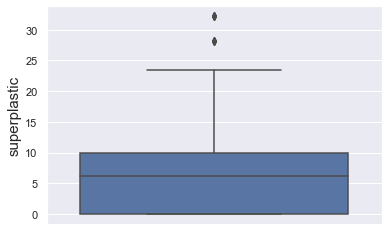

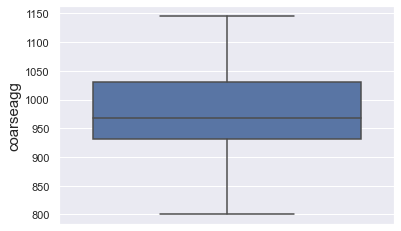

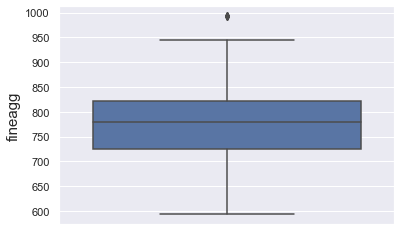

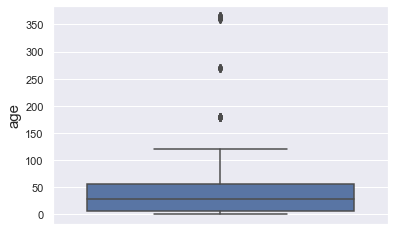

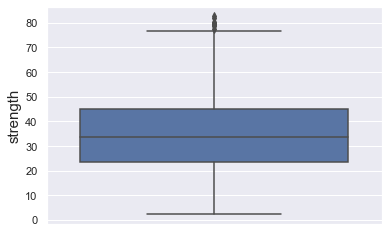

In [22]:
# Boxplot to further see outliers

for col in concrete.columns:
    sns.boxplot(y=concrete[col]);
    plt.ylabel(col, size=15);
    plt.show()

<font color='green'>**Observation:**
- There are some outliers that might need treatment
- Few input variables are very skewed
</font>

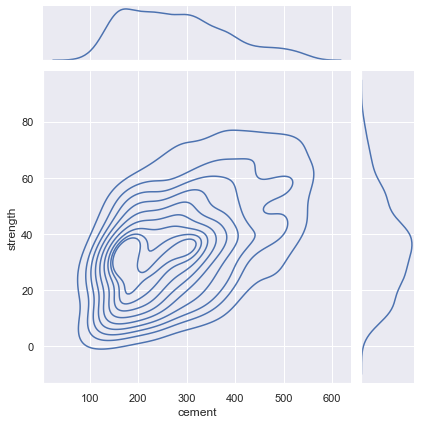

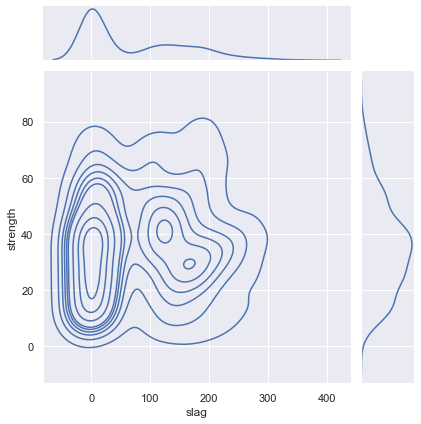

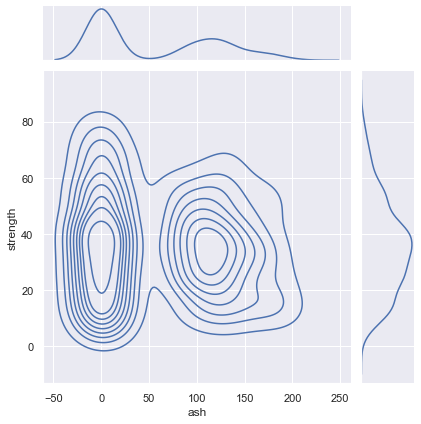

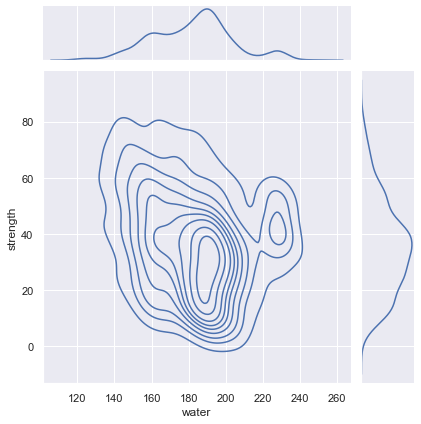

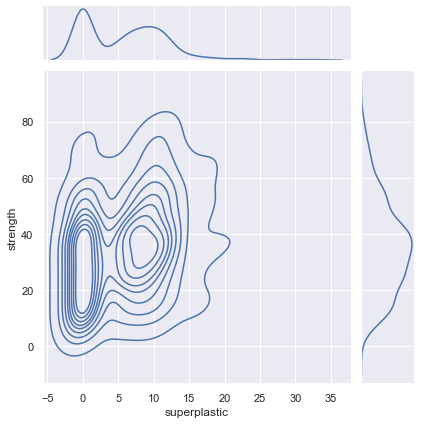

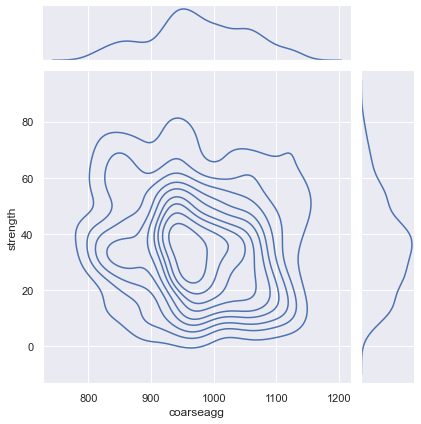

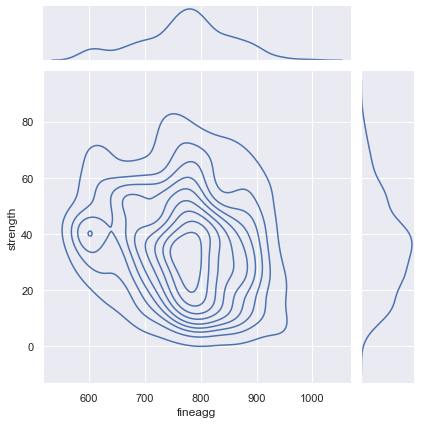

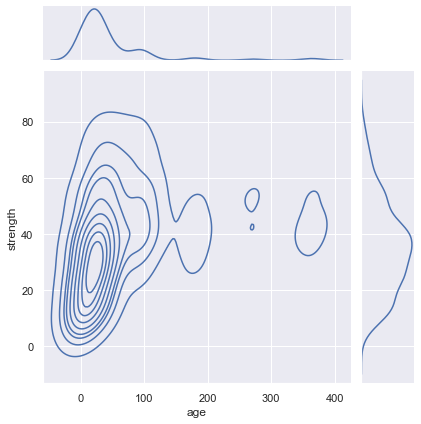

In [23]:
# jointplot with KDE

for col in concrete.columns[:-1]:
    sns.jointplot(y=concrete['strength'],x=concrete[col],kind="kde");
    plt.show()

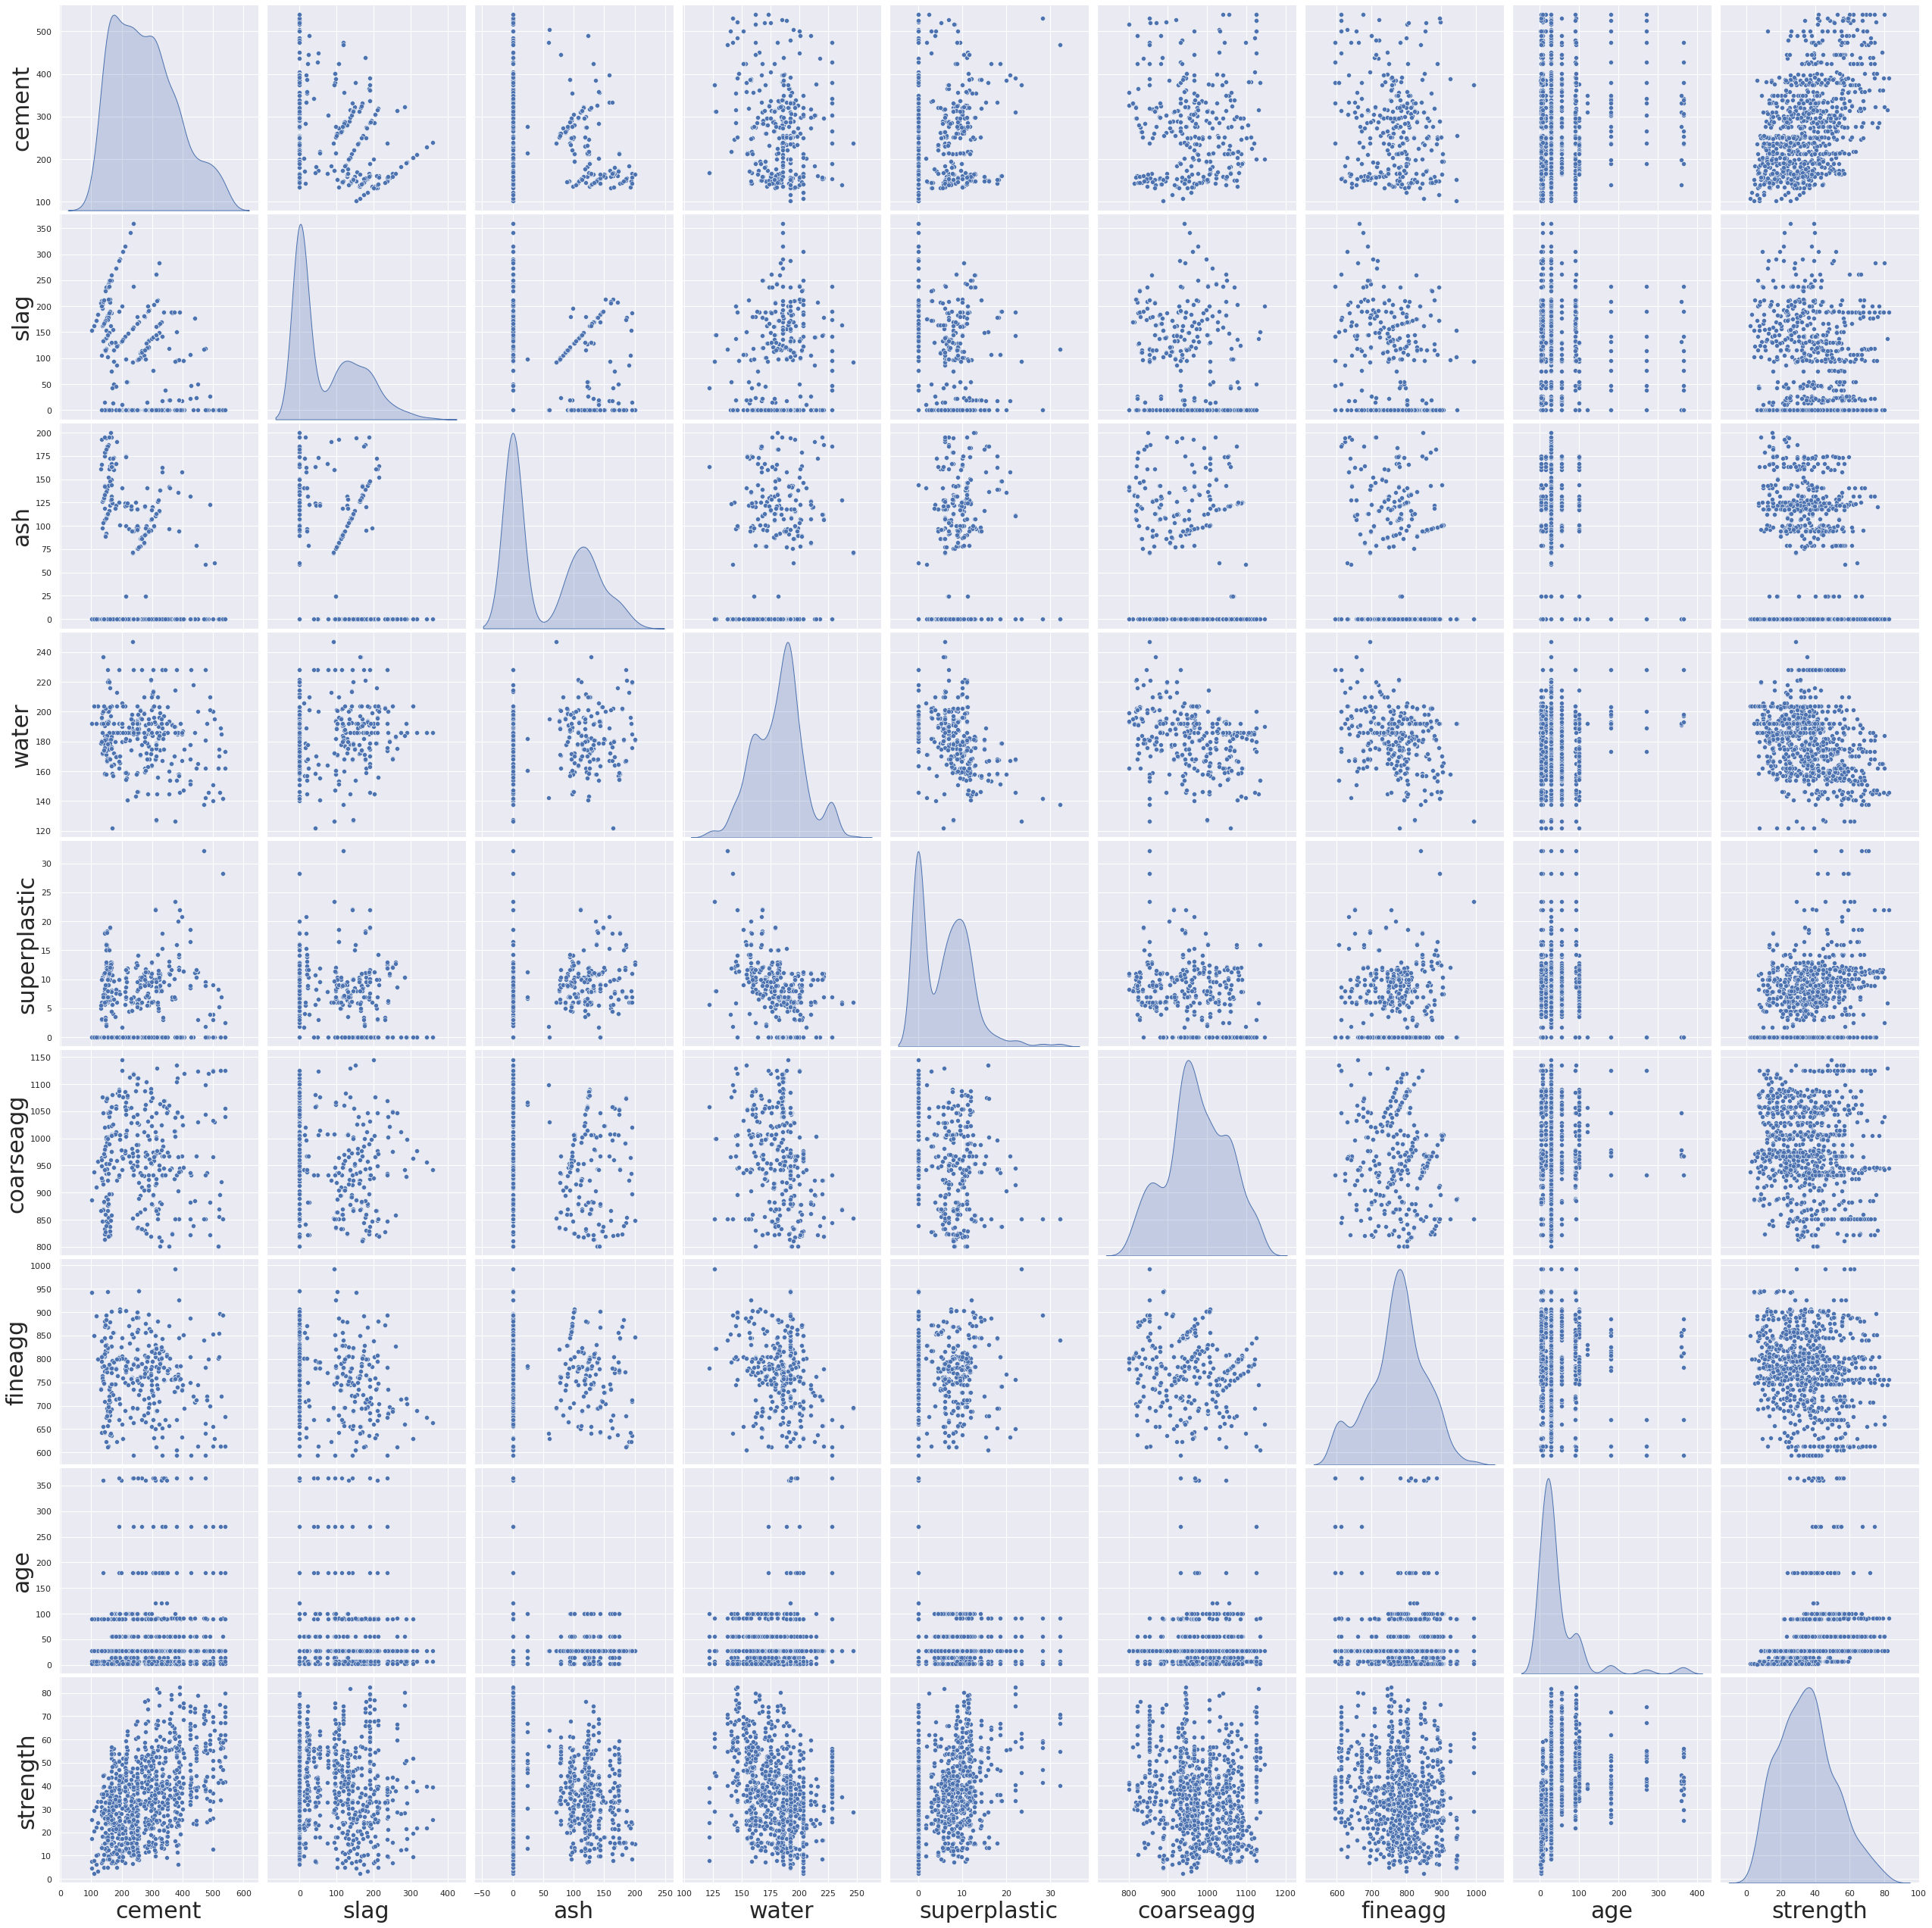

In [24]:
# pairplot

sns.set_context(rc={"axes.labelsize":30})
sns.pairplot(concrete, diag_kind ='kde', height = 4);

plt.rcParams.update(plt.rcParamsDefault)

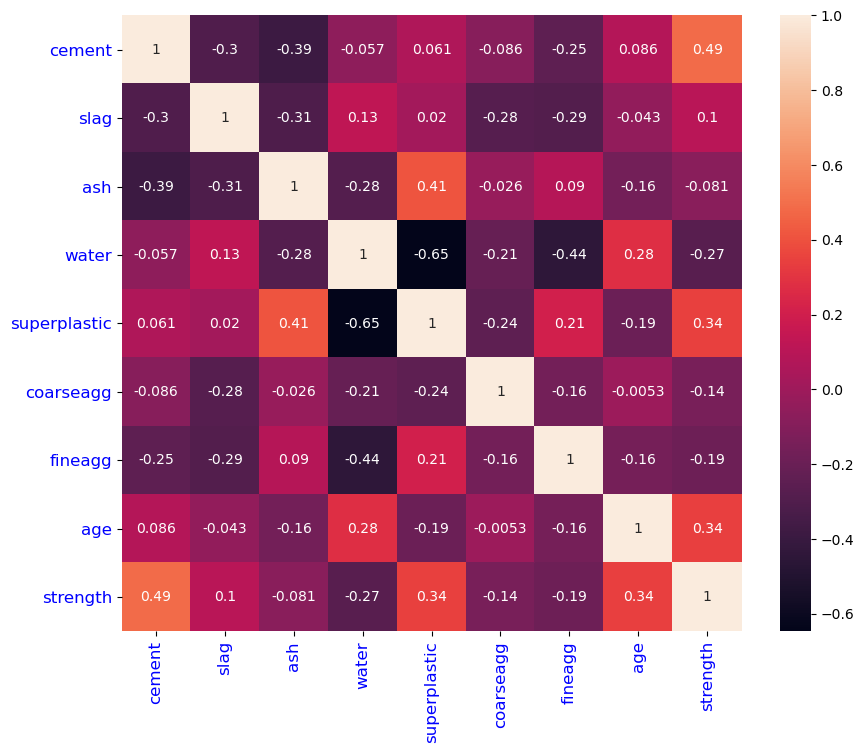

In [25]:
# correlation matrix

plt.figure(figsize=(10,8))
sns.heatmap(concrete.corr(), annot=True, annot_kws={"size":10});
plt.xticks(rotation=90, size=12, color='blue');
plt.yticks(rotation=0, size=12, color='blue');

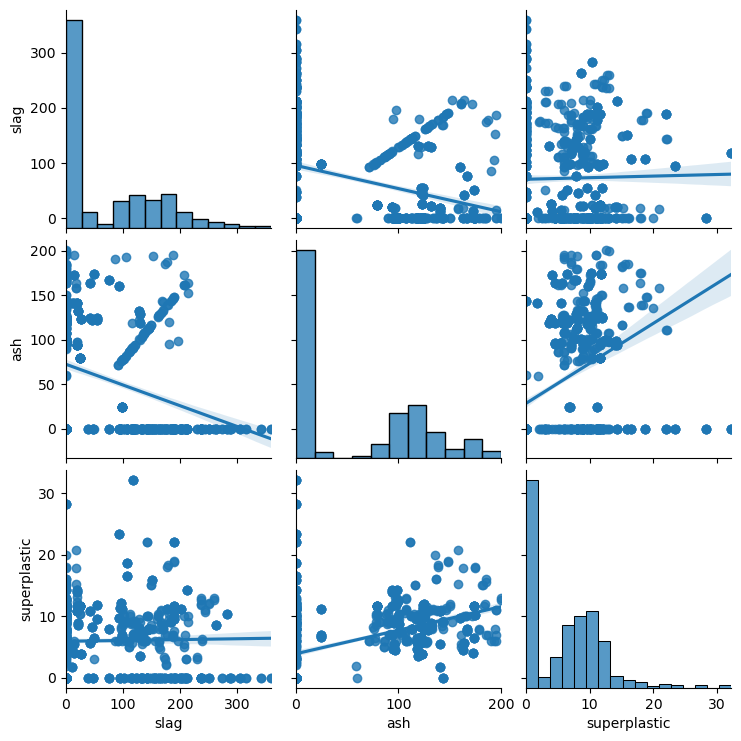

In [26]:
# check relation of 3 independent variables that has 0 as values

sns.pairplot(concrete[['slag', 'ash','superplastic']], kind='reg');

<font color='green'>**Observation:**
- There doesn't seem to have much correlation between independent variables
</font>

### 3. Feature Engineering and getting data model ready

In [394]:
# copy the data into another dataframe for modifications

con_mod = concrete.copy()

In [395]:
# taking log of age

con_mod['log_age'] = np.log(con_mod['age'])

In [396]:
# Treating outliers

for col in ['slag','water','superplastic','fineagg']:
    Q1=con_mod[col].quantile(0.25)
    Q3=con_mod[col].quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1 - (1.5*IQR)
    Upper_Whisker = Q3 + (1.5*IQR)
    con_mod[col] = np.where((con_mod[col] > Upper_Whisker) | (con_mod[col] < Lower_Whisker), con_mod[col].median() ,\
                            con_mod[col])

In [397]:
# checking sample head data

con_mod.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,log_age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,3.332205
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,2.639057
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,3.332205
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,3.332205
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,3.332205
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86,4.499810
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75,1.945910
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64,4.025352
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65,3.332205
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99,3.332205


In [398]:
con_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1005 non-null   float64
 1   slag          1005 non-null   float64
 2   ash           1005 non-null   float64
 3   water         1005 non-null   float64
 4   superplastic  1005 non-null   float64
 5   coarseagg     1005 non-null   float64
 6   fineagg       1005 non-null   float64
 7   age           1005 non-null   int64  
 8   strength      1005 non-null   float64
 9   log_age       1005 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 86.4 KB


In [399]:
# Check for Skew for all variables

con_mod.skew().sort_values(ascending=False)

age             3.253974
slag            0.830443
cement          0.564959
superplastic    0.513287
ash             0.497231
strength        0.395696
water           0.126628
coarseagg      -0.065256
log_age        -0.142556
fineagg        -0.335247
dtype: float64

In [400]:
# Check for kurt for all variables

con_mod.kurt().sort_values(ascending=False)

age             11.961963
water           -0.076447
fineagg         -0.198321
strength        -0.305309
superplastic    -0.313746
log_age         -0.327466
cement          -0.432458
slag            -0.524156
coarseagg       -0.583049
ash             -1.366694
dtype: float64

In [401]:
# drop original variables age

con_mod.drop(['age'],axis=1,inplace=True)

In [402]:
# checking sample head data

con_mod.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength,log_age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,29.89,3.332205
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,23.51,2.639057
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,29.22,3.332205
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,45.85,3.332205
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,18.29,3.332205
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,21.86,4.499810
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,15.75,1.945910
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,36.64,4.025352
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,21.65,3.332205
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28.99,3.332205


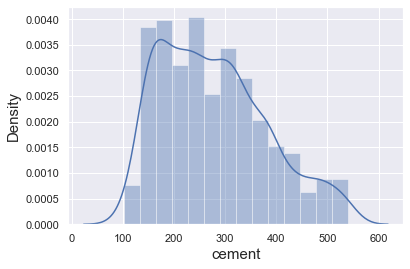

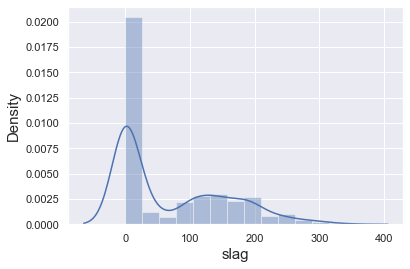

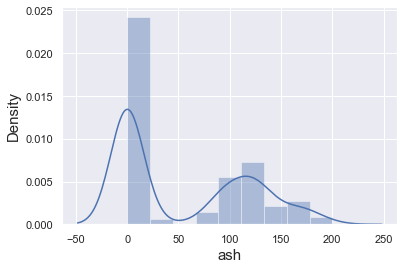

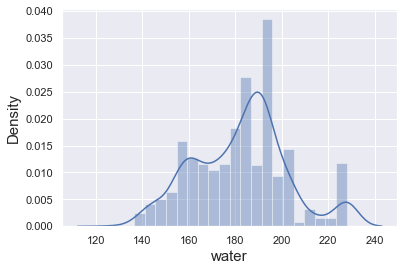

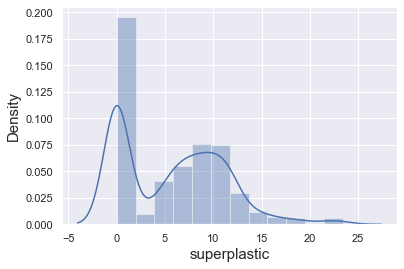

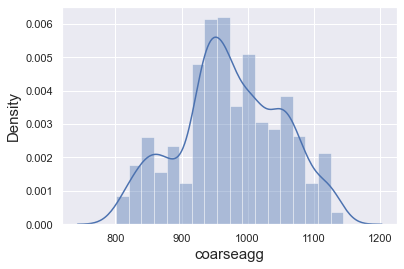

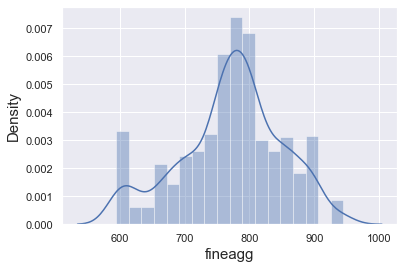

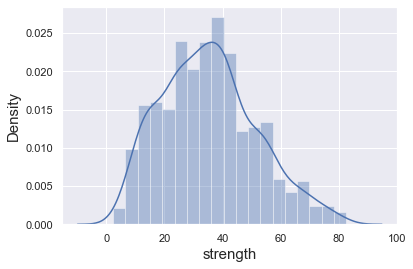

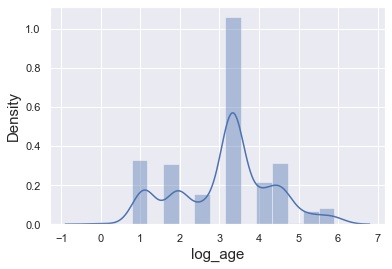

In [403]:
# continues columns plot

for col in con_mod.columns:
    sns.distplot(x=con_mod[col]);
    plt.xlabel(col,size=15);
    plt.ylabel('Density',size=15);
    plt.show();

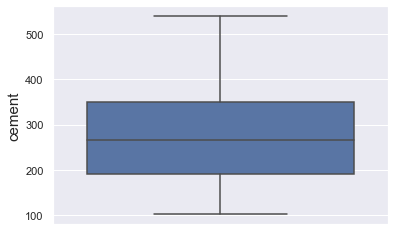

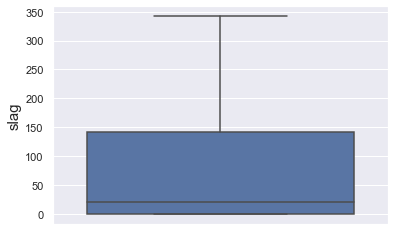

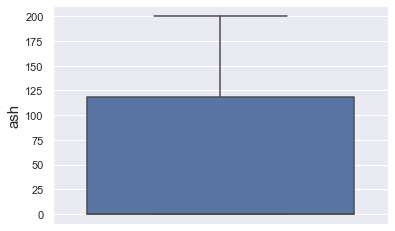

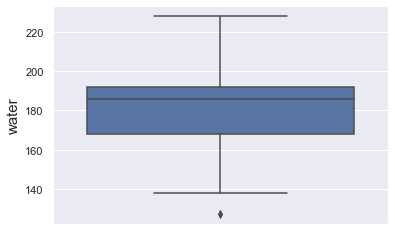

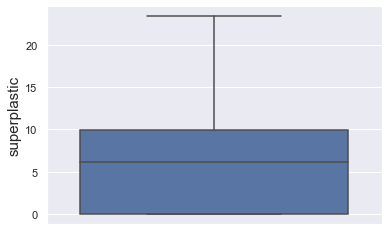

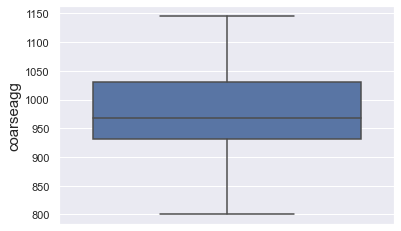

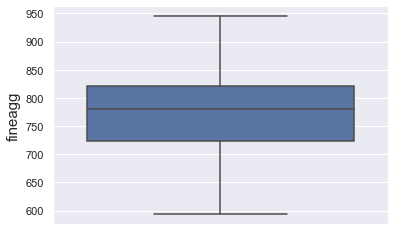

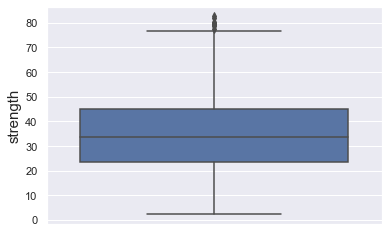

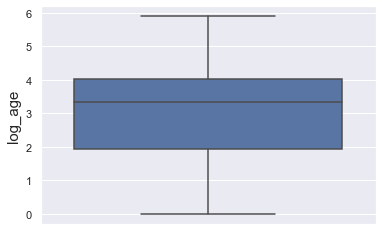

In [404]:
# Boxplot to further see outliers

for col in con_mod.columns:
    sns.boxplot(y=con_mod[col]);
    plt.ylabel(col, size=15);
    plt.show()

In [405]:
# Defining independent and dependent variable

X = con_mod.drop(['strength'],axis=1)
y = con_mod['strength']

In [406]:
X.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'log_age'],
      dtype='object')

In [407]:
X

,cement,slag,ash,water,superplastic,coarseagg,fineagg,log_age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3.332205
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,2.639057
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,3.332205
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,3.332205
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,3.332205
...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,3.332205
1026,531.3,0.0,0.0,141.8,6.1,852.1,893.7,1.098612
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,3.332205
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,5.598422


In [408]:
# Split the data into training and test set in the ratio of 70:30 respectively

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=7)

In [409]:
sclr_std = StandardScaler()

X_train_scaled = sclr_std.fit_transform(X_train)
X_test_scaled = sclr_std.fit_transform(X_test)

### 4. Creating the Model and Tuning It:

In [444]:
 # creating Linear Regression model and fit the model on train data
    
linreg = LinearRegression()

linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [445]:
# checking model score for Linear regression

print("Training Score: ", linreg.score(X_train_scaled, y_train))
print("Test Score: ", linreg.score(X_test_scaled, y_test))

Training Score:  0.8147391320464128
Test Score:  0.8250365984203392


In [446]:
# Variable shape

X_train_scaled.shape

(703, 8)

In [447]:
model_comp = pd.DataFrame(columns=['model', 'training_score', 'test_score'])

model_comp

,model,training_score,test_score


In [448]:
# Insert model score into dataframe

comp = {'model':'Linear regression d1', 'training_score':linreg.score(X_train_scaled, y_train),\
        'test_score':linreg.score(X_test_scaled, y_test)}
model_comp = model_comp.append(comp, ignore_index=True)

model_comp

,model,training_score,test_score
0,Linear regression d1,0.814739,0.825037


In [449]:
# polynomial degree 2

poly2 = PolynomialFeatures(degree=2, interaction_only=True)

X_train_d2= poly2.fit_transform(X_train_scaled)
X_test_d2 = poly2.fit_transform(X_test_scaled)

linreg_d2 = LinearRegression()

linreg_d2.fit(X_train_d2,y_train)

# checking model score for polynomial degree 2

print("Training Score: ", linreg_d2.score(X_train_d2, y_train))
print("Test Score: ", linreg_d2.score(X_test_d2, y_test))

Training Score:  0.8802252649168438
Test Score:  0.8603028016353303


In [450]:
# Variable shape

X_train_d2.shape

(703, 37)

In [451]:
# Insert model score into dataframe

comp = {'model':'Linear regression d2', 'training_score':linreg_d2.score(X_train_d2, y_train),\
        'test_score':linreg_d2.score(X_test_d2, y_test)}
model_comp = model_comp.append(comp, ignore_index=True)

model_comp

,model,training_score,test_score
0,Linear regression d1,0.814739,0.825037
1,Linear regression d2,0.880225,0.860303


In [452]:
# polynomial degree 3 with liniera regression

poly3 = PolynomialFeatures(degree=3, interaction_only=True)

X_train_d3= poly3.fit_transform(X_train_scaled)
X_test_d3 = poly3.fit_transform(X_test_scaled)

linreg_d3 = LinearRegression()

linreg_d3.fit(X_train_d3,y_train)

# checking model score for polynomial degree 3

print("Training Score: ", linreg_d3.score(X_train_d3, y_train))
print("Test Score: ", linreg_d3.score(X_test_d3, y_test))

Training Score:  0.9134641438802316
Test Score:  0.890740303428828


In [453]:
# Insert model score into dataframe

comp = {'model':'Linear regression d3', 'training_score':linreg_d3.score(X_train_d3, y_train),\
        'test_score':linreg_d3.score(X_test_d3, y_test)}
model_comp = model_comp.append(comp, ignore_index=True)

model_comp

,model,training_score,test_score
0,Linear regression d1,0.814739,0.825037
1,Linear regression d2,0.880225,0.860303
2,Linear regression d3,0.913464,0.890740


In [454]:
# Variable shape

X_train_d3.shape

(703, 93)

In [455]:
# # polynomial degree 4

poly4 = PolynomialFeatures(degree=4, interaction_only=True)

X_train_d4= poly4.fit_transform(X_train_scaled)
X_test_d4 = poly4.fit_transform(X_test_scaled)

linreg_d4 = LinearRegression()

linreg_d4.fit(X_train_d4,y_train)

# checking model score for polynomial degree 4

print("Training Score: ", linreg_d4.score(X_train_d4, y_train))
print("Test Score: ", linreg_d4.score(X_test_d4, y_test))

Training Score:  0.9341534670276813
Test Score:  0.826564265623883


In [456]:
# Variable shape

X_train_d4.shape

(703, 163)

In [457]:
# Insert model score into dataframe

comp = {'model':'Linear regression d4', 'training_score':linreg_d4.score(X_train_d4, y_train),\
        'test_score':linreg_d4.score(X_test_d4, y_test)}
model_comp = model_comp.append(comp, ignore_index=True)

model_comp

,model,training_score,test_score
0,Linear regression d1,0.814739,0.825037
1,Linear regression d2,0.880225,0.860303
2,Linear regression d3,0.913464,0.890740
3,Linear regression d4,0.934153,0.826564


<font color='green'>**Observation:** </font>
- At Polynomial degree 4 the test score dropped so degree 3 is the most optimal for linier regression
- Polynomial degree 2, 3, 4 takes variable counts to 37, 93, 163 respectively. So that's computation costly.

In [458]:
# polynomial degree 3 with ridge regression

poly3 = PolynomialFeatures(degree=3, interaction_only=True)

X_train_d3= poly3.fit_transform(X_train_scaled)
X_test_d3 = poly3.fit_transform(X_test_scaled)

ridge = Ridge(random_state=7)

ridge.fit(X_train_d3,y_train)

# checking model score for polynomial degree 3

print("Training Score: ", ridge.score(X_train_d3, y_train))
print("Test Score: ", ridge.score(X_test_d3, y_test))

Training Score:  0.9131276729962997
Test Score:  0.8921675097304219


In [459]:
# Insert model score into dataframe

comp = {'model':'Ridge', 'training_score':ridge.score(X_train_d3, y_train),\
        'test_score':ridge.score(X_test_d3, y_test)}
model_comp = model_comp.append(comp, ignore_index=True)

model_comp

,model,training_score,test_score
0,Linear regression d1,0.814739,0.825037
1,Linear regression d2,0.880225,0.860303
2,Linear regression d3,0.913464,0.890740
3,Linear regression d4,0.934153,0.826564
4,Ridge,0.913128,0.892168


In [460]:
# polynomial degree 3 with Lasso regression

poly3 = PolynomialFeatures(degree=3, interaction_only=True)

X_train_d3= poly3.fit_transform(X_train_scaled)
X_test_d3 = poly3.fit_transform(X_test_scaled)

lasso = Lasso(random_state=7)

lasso.fit(X_train_d3,y_train)

# checking model score for polynomial degree 3

print("Training Score: ", lasso.score(X_train_d3, y_train))
print("Test Score: ", lasso.score(X_test_d3, y_test))

Training Score:  0.7920564848452147
Test Score:  0.7920955324827758


In [461]:
# Insert model score into dataframe

comp = {'model':'Lasso', 'training_score':lasso.score(X_train_d3, y_train),\
        'test_score':lasso.score(X_test_d3, y_test)}
model_comp = model_comp.append(comp, ignore_index=True)

model_comp

,model,training_score,test_score
0,Linear regression d1,0.814739,0.825037
1,Linear regression d2,0.880225,0.860303
2,Linear regression d3,0.913464,0.890740
3,Linear regression d4,0.934153,0.826564
4,Ridge,0.913128,0.892168
5,Lasso,0.792056,0.792096


In [462]:
# Decision tree

dtr = DecisionTreeRegressor( min_samples_leaf=12)

dtr.fit(X_train_scaled, y_train)

# checking model score for Decision tree

print("Training Score: ", dtr.score(X_train_scaled, y_train))
print("Test Score: ", dtr.score(X_test_scaled, y_test))

Training Score:  0.8412257101611136
Test Score:  0.7399089268895824


In [463]:
# Insert model score into dataframe

comp = {'model':'Decision Tree', 'training_score':dtr.score(X_train_scaled, y_train),\
        'test_score':dtr.score(X_test_scaled, y_test)}
model_comp = model_comp.append(comp, ignore_index=True)

model_comp

,model,training_score,test_score
0,Linear regression d1,0.814739,0.825037
1,Linear regression d2,0.880225,0.860303
2,Linear regression d3,0.913464,0.890740
3,Linear regression d4,0.934153,0.826564
4,Ridge,0.913128,0.892168
5,Lasso,0.792056,0.792096
6,Decision Tree,0.841226,0.739909


In [464]:
# Support Vector

svr_model = SVR()

svr_model.fit(X_train_scaled, y_train)

# checking model score for Support Vector

print("Training Score: ", svr_model.score(X_train_scaled, y_train))
print("Test Score: ", svr_model.score(X_test_scaled, y_test))

Training Score:  0.7627712239607892
Test Score:  0.7420217159901986


In [465]:
# Insert model score into dataframe

comp = {'model':'Support Vector', 'training_score':svr_model.score(X_train_scaled, y_train),\
        'test_score':svr_model.score(X_test_scaled, y_test)}
model_comp = model_comp.append(comp, ignore_index=True)

model_comp

,model,training_score,test_score
0,Linear regression d1,0.814739,0.825037
1,Linear regression d2,0.880225,0.860303
2,Linear regression d3,0.913464,0.890740
3,Linear regression d4,0.934153,0.826564
4,Ridge,0.913128,0.892168
5,Lasso,0.792056,0.792096
6,Decision Tree,0.841226,0.739909
7,Support Vector,0.762771,0.742022


In [466]:
# Random Forest

rf = RandomForestRegressor(random_state=7)

rf.fit(X_train_scaled, y_train)

# checking model score

print("Training Score: ", rf.score(X_train_scaled, y_train))
print("Test Score: ", rf.score(X_test_scaled, y_test))

Training Score:  0.9826973093385769
Test Score:  0.8844816736992479


In [467]:
# Insert model score into dataframe

comp = {'model':'Random Forest', 'training_score':rf.score(X_train_scaled, y_train),\
        'test_score':rf.score(X_test_scaled, y_test)}
model_comp = model_comp.append(comp, ignore_index=True)

model_comp

,model,training_score,test_score
0,Linear regression d1,0.814739,0.825037
1,Linear regression d2,0.880225,0.860303
2,Linear regression d3,0.913464,0.890740
3,Linear regression d4,0.934153,0.826564
4,Ridge,0.913128,0.892168
5,Lasso,0.792056,0.792096
6,Decision Tree,0.841226,0.739909
7,Support Vector,0.762771,0.742022
8,Random Forest,0.982697,0.884482


In [468]:
# Bagging

bgr = BaggingRegressor(random_state=7)

bgr.fit(X_train_scaled, y_train)

# checking model score

print("Training Score: ", bgr.score(X_train_scaled, y_train))
print("Test Score: ", bgr.score(X_test_scaled, y_test))

Training Score:  0.9755155747154979
Test Score:  0.858700445226942


In [469]:
# Insert model score into dataframe

comp = {'model':'Bagging', 'training_score':bgr.score(X_train_scaled, y_train),\
        'test_score':bgr.score(X_test_scaled, y_test)}
model_comp = model_comp.append(comp, ignore_index=True)

model_comp

,model,training_score,test_score
0,Linear regression d1,0.814739,0.825037
1,Linear regression d2,0.880225,0.860303
2,Linear regression d3,0.913464,0.890740
3,Linear regression d4,0.934153,0.826564
4,Ridge,0.913128,0.892168
5,Lasso,0.792056,0.792096
6,Decision Tree,0.841226,0.739909
7,Support Vector,0.762771,0.742022
8,Random Forest,0.982697,0.884482
9,Bagging,0.975516,0.858700


In [470]:
# Gradient boosting

gbr = GradientBoostingRegressor(random_state=7)

gbr.fit(X_train_scaled, y_train)

# checking model score

print("Training Score: ", gbr.score(X_train_scaled, y_train))
print("Test Score: ", gbr.score(X_test_scaled, y_test))

Training Score:  0.949247859761813
Test Score:  0.8871890036078092


In [471]:
# Insert model score into dataframe

comp = {'model':'Gradient Boosting', 'training_score':gbr.score(X_train_scaled, y_train),\
        'test_score':gbr.score(X_test_scaled, y_test)}
model_comp = model_comp.append(comp, ignore_index=True)

model_comp

,model,training_score,test_score
0,Linear regression d1,0.814739,0.825037
1,Linear regression d2,0.880225,0.860303
2,Linear regression d3,0.913464,0.890740
3,Linear regression d4,0.934153,0.826564
4,Ridge,0.913128,0.892168
5,Lasso,0.792056,0.792096
6,Decision Tree,0.841226,0.739909
7,Support Vector,0.762771,0.742022
8,Random Forest,0.982697,0.884482
9,Bagging,0.975516,0.858700


In [472]:
# Adaptive boosting

abr = AdaBoostRegressor(random_state=7)

abr.fit(X_train_scaled, y_train)

# checking model score

print("Training Score: ", abr.score(X_train_scaled, y_train))
print("Test Score: ", abr.score(X_test_scaled, y_test))

Training Score:  0.811977483761354
Test Score:  0.7495215570986293


In [473]:
# Insert model score into dataframe

comp = {'model':'Adaptive Boosting', 'training_score':abr.score(X_train_scaled, y_train),\
        'test_score':abr.score(X_test_scaled, y_test)}
model_comp = model_comp.append(comp, ignore_index=True)

model_comp

,model,training_score,test_score
0,Linear regression d1,0.814739,0.825037
1,Linear regression d2,0.880225,0.860303
2,Linear regression d3,0.913464,0.890740
3,Linear regression d4,0.934153,0.826564
4,Ridge,0.913128,0.892168
5,Lasso,0.792056,0.792096
6,Decision Tree,0.841226,0.739909
7,Support Vector,0.762771,0.742022
8,Random Forest,0.982697,0.884482
9,Bagging,0.975516,0.858700


In [474]:
# KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(X_train_scaled, y_train)

# checking model score

print("Training Score: ", knr.score(X_train_scaled, y_train))
print("Test Score: ", knr.score(X_test_scaled, y_test))

Training Score:  0.893879274721083
Test Score:  0.8446202603458117


In [475]:
# Insert model score into dataframe

comp = {'model':'K Neighbors Regressor', 'training_score':knr.score(X_train_scaled, y_train),\
        'test_score':knr.score(X_test_scaled, y_test)}
model_comp = model_comp.append(comp, ignore_index=True)

model_comp

,model,training_score,test_score
0,Linear regression d1,0.814739,0.825037
1,Linear regression d2,0.880225,0.860303
2,Linear regression d3,0.913464,0.890740
3,Linear regression d4,0.934153,0.826564
4,Ridge,0.913128,0.892168
5,Lasso,0.792056,0.792096
6,Decision Tree,0.841226,0.739909
7,Support Vector,0.762771,0.742022
8,Random Forest,0.982697,0.884482
9,Bagging,0.975516,0.858700


In [476]:
model_comp.sort_values(by=['test_score'], ascending=False)

,model,training_score,test_score
4,Ridge,0.913128,0.892168
2,Linear regression d3,0.913464,0.890740
10,Gradient Boosting,0.949248,0.887189
8,Random Forest,0.982697,0.884482
1,Linear regression d2,0.880225,0.860303
9,Bagging,0.975516,0.858700
12,K Neighbors Regressor,0.893879,0.844620
3,Linear regression d4,0.934153,0.826564
0,Linear regression d1,0.814739,0.825037
5,Lasso,0.792056,0.792096


<font color='green'>**Observation:** </font>
- Based on performance comparison Ridge degree 3 from linear, Random forest from Bagging, Gradient Boosting from boosting gives the best test score.
- So these three models will be considered for K-fold cross validation and further performance tuning

#### <font color='sky blue'>K Fold Cross Validation</font>

In [550]:
# Kfold


splits = 10

kfold = KFold(n_splits=splits,random_state=7)

In [551]:
# Dataframe for final model comparison
# If Model is tuned, Model Name, K Fold score mean, Standard deviation, score interval of 95% confidence, test score

dfFinalModel = pd.DataFrame(columns=['IsTuned','model','mean_score', 'std', '95%Conf', 'test_score'])

dfFinalModel

,IsTuned,model,mean_score,std,95%Conf,test_score


In [552]:
# polynomial degree 3 for ridge

ridge_d3_kfold = Ridge(random_state=7)

scores_ridge = cross_val_score(ridge_d3_kfold, X_train_d3, y_train, scoring='r2', cv= kfold, n_jobs=-1)

ridge_d3_kfold.fit(X_train_d3, y_train)

scores_ridge

array([0.87287314, 0.85832128, 0.8227992 , 0.88798206, 0.89114634,
       0.87768439, 0.78469753, 0.8614421 , 0.84668941, 0.90381171])

In [553]:
# Insert model stas into dataframe


conf_range = "{low:.2f} to {high:.2f}".format(low=(scores_ridge.mean()-2*scores_ridge.std()),\
                                              high=(scores_ridge.mean()+2*scores_ridge.std()))

comp_final = {'IsTuned':'N','model':'Ridge polynomial d3', 'mean_score':scores_ridge.mean(), 'std':scores_ridge.std(),\
        '95%Conf':conf_range, 'test_score':ridge_d3_kfold.score(X_test_d3, y_test)}
dfFinalModel = dfFinalModel.append(comp_final, ignore_index=True)

dfFinalModel

,IsTuned,model,mean_score,std,95%Conf,test_score
0,N,Ridge polynomial d3,0.860745,0.033737,0.79 to 0.93,0.892168


In [554]:
# Random Forest

rf_kfold = RandomForestRegressor(random_state=7)

scores_rf = cross_val_score(rf_kfold, X_train_scaled, y_train, scoring='r2', cv= kfold, n_jobs=-1)

rf_kfold.fit(X_train_scaled, y_train)

scores_rf

array([0.88453844, 0.8841658 , 0.88764538, 0.92312373, 0.89527351,
       0.84606413, 0.83804553, 0.88157827, 0.86882103, 0.90601842])

In [555]:
# Insert model stas into dataframe

conf_range = "{low:.2f} to {high:.2f}".format(low=(scores_rf.mean()-2*scores_rf.std()),\
                                              high=(scores_rf.mean()+2*scores_rf.std()))

comp_final = {'IsTuned':'N','model':'Random Forest', 'mean_score':scores_rf.mean(), 'std':scores_rf.std(),\
        '95%Conf':conf_range, 'test_score':rf_kfold.score(X_test_scaled, y_test)}
dfFinalModel = dfFinalModel.append(comp_final, ignore_index=True)

dfFinalModel

,IsTuned,model,mean_score,std,95%Conf,test_score
0,N,Ridge polynomial d3,0.860745,0.033737,0.79 to 0.93,0.892168
1,N,Random Forest,0.881527,0.024253,0.83 to 0.93,0.884482


In [556]:
# Gradient boosting

gbr_kfold = GradientBoostingRegressor(random_state=7)

scores_gbr = cross_val_score(gbr_kfold, X_train_scaled, y_train, scoring='r2', cv= kfold, n_jobs=-1)

gbr_kfold.fit(X_train_scaled, y_train)

scores_gbr

array([0.86576441, 0.87623214, 0.89930194, 0.91048851, 0.91285972,
       0.87693975, 0.87324415, 0.88399038, 0.86210346, 0.89760592])

In [557]:
# Insert model stas into dataframe

conf_range = "{low:.2f} to {high:.2f}".format(low=(scores_gbr.mean()-2*scores_gbr.std()),\
                                              high=(scores_gbr.mean()+2*scores_gbr.std()))

comp_final = {'IsTuned':'N','model':'Gradient boosting', 'mean_score':scores_gbr.mean(), 'std':scores_gbr.std(),\
        '95%Conf':conf_range, 'test_score':gbr_kfold.score(X_test_scaled, y_test)}
dfFinalModel = dfFinalModel.append(comp_final, ignore_index=True)

dfFinalModel

,IsTuned,model,mean_score,std,95%Conf,test_score
0,N,Ridge polynomial d3,0.860745,0.033737,0.79 to 0.93,0.892168
1,N,Random Forest,0.881527,0.024253,0.83 to 0.93,0.884482
2,N,Gradient boosting,0.885853,0.017197,0.85 to 0.92,0.887189


<font color='green'>**Observation:** </font>
- Random Forest and Gradient boosing has better 95% confidence interval and better mean score

#### <font color='sky blue'>Hyperparameters Tuning</font>

In [558]:
# Parameter for Ridge

param_ridge = {"alpha": np.arange(.01,1.01,.01)}

samples =50  # Number of Random Samples

randomCV_ridge = RandomizedSearchCV(ridge_d3_kfold, param_distributions=param_ridge, n_iter=samples, scoring='r2', cv=kfold,\
                                 random_state=7, n_jobs=-1)

randomCV_ridge.fit(X_train_d3, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
                   estimator=Ridge(random_state=7), n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
                   random_state=7, scoring='r2')

In [559]:
# Find best parameters for Ridge

randomCV_ridge.best_params_

{'alpha': 1.0}

In [560]:
# Ridge after tuning

ridge_tuned = Ridge(alpha=1,random_state=7)

scores_ridge_tuned = cross_val_score(ridge_tuned, X_train_d3, y_train, scoring='r2', cv= kfold, n_jobs=-1)

ridge_tuned.fit(X_train_d3, y_train)

scores_ridge_tuned

array([0.87287314, 0.85832128, 0.8227992 , 0.88798206, 0.89114634,
       0.87768439, 0.78469753, 0.8614421 , 0.84668941, 0.90381171])

In [561]:
ridge_tuned.score(X_test_d3, y_test)

0.8921675097304219

In [562]:
# Insert model stas into dataframe

conf_range = "{low:.2f} to {high:.2f}".format(low=(scores_ridge_tuned.mean()-2*scores_ridge_tuned.std()),\
                                              high=(scores_ridge_tuned.mean()+2*scores_ridge_tuned.std()))

comp_final = {'IsTuned':'Y','model':'Ridge polynomial d3', 'mean_score':scores_ridge_tuned.mean(),\
              'std':scores_ridge_tuned.std(), '95%Conf':conf_range, 'test_score':ridge_tuned.score(X_test_d3, y_test)}

dfFinalModel = dfFinalModel.append(comp_final, ignore_index=True)

dfFinalModel

,IsTuned,model,mean_score,std,95%Conf,test_score
0,N,Ridge polynomial d3,0.860745,0.033737,0.79 to 0.93,0.892168
1,N,Random Forest,0.881527,0.024253,0.83 to 0.93,0.884482
2,N,Gradient boosting,0.885853,0.017197,0.85 to 0.92,0.887189
3,Y,Ridge polynomial d3,0.860745,0.033737,0.79 to 0.93,0.892168


In [563]:
# Parameter for Random forest

param_rf = {"n_estimators": np.arange(25,200,25),
            "criterion": ["mse", "mae"],
            "max_depth": np.arange(3,15),
            "max_features": ['auto',.7]}

samples =50  # Number of Random Samples

randomCV_rf = RandomizedSearchCV(rf_kfold, param_distributions=param_rf, n_iter=samples, scoring='r2', cv=kfold, random_state=7\
                                , n_jobs=-1)

randomCV_rf.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
                   estimator=RandomForestRegressor(random_state=7), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['auto', 0.7],
                                        'n_estimators': array([ 25,  50,  75, 100, 125, 150, 175])},
                   random_state=7, scoring='r2')

In [564]:
# Find best parameters for random forest

randomCV_rf.best_params_

{'n_estimators': 125, 'max_features': 0.7, 'max_depth': 14, 'criterion': 'mae'}

In [565]:
# Random Forest after tuning

rf_tuned = RandomForestRegressor(n_estimators= 125, max_features= 0.7, max_depth= 14,\
                                 criterion='mae', random_state=7)

scores_rf_tuned = cross_val_score(rf_tuned, X_train_scaled, y_train, scoring='r2', cv= kfold, n_jobs=-1)

rf_tuned.fit(X_train_scaled, y_train)

scores_rf_tuned

array([0.90091894, 0.88928546, 0.87789114, 0.91680767, 0.91433206,
       0.86392246, 0.86465719, 0.88823721, 0.87765674, 0.90690932])

In [566]:
rf_tuned.score(X_test_scaled, y_test)

0.891364043350179

In [567]:
# Random forest feature importances
pd.Series(rf_tuned.feature_importances_, X_train.columns ).sort_values(ascending= False)

log_age         0.272468
cement          0.211343
water           0.137933
slag            0.086862
fineagg         0.086125
superplastic    0.082357
coarseagg       0.077437
ash             0.045476
dtype: float64

In [568]:
# Insert model stas into dataframe

conf_range = "{low:.2f} to {high:.2f}".format(low=(scores_rf_tuned.mean()-2*scores_rf_tuned.std()),\
                                              high=(scores_rf_tuned.mean()+2*scores_rf_tuned.std()))

comp_final = {'IsTuned':'Y','model':'Random Forest', 'mean_score':scores_rf_tuned.mean(), 'std':scores_rf_tuned.std(),\
        '95%Conf':conf_range, 'test_score':rf_tuned.score(X_test_scaled, y_test)}
dfFinalModel = dfFinalModel.append(comp_final, ignore_index=True)

dfFinalModel

,IsTuned,model,mean_score,std,95%Conf,test_score
0,N,Ridge polynomial d3,0.860745,0.033737,0.79 to 0.93,0.892168
1,N,Random Forest,0.881527,0.024253,0.83 to 0.93,0.884482
2,N,Gradient boosting,0.885853,0.017197,0.85 to 0.92,0.887189
3,Y,Ridge polynomial d3,0.860745,0.033737,0.79 to 0.93,0.892168
4,Y,Random Forest,0.890062,0.018278,0.85 to 0.93,0.891364


In [569]:
# Parameter for Gradient Boost

param_gb = {"loss": ['ls', 'lad', 'huber', 'quantile'],
            "n_estimators": np.arange(50,500,50),
            "learning_rate":[0.025,0.05,0.075,0.1,0.125,0.15],
            "criterion": ['friedman_mse', 'mse', 'mae'],
            "max_depth": np.arange(1,5)}

samples =50  # Number of Random Samples

randomCV_gb = RandomizedSearchCV(gbr_kfold, param_distributions=param_gb, n_iter=samples, scoring='r2', cv=kfold,\
                                 random_state=7, n_jobs=-1)

randomCV_gb.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
                   estimator=GradientBoostingRegressor(random_state=7),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.025, 0.05, 0.075,
                                                          0.1, 0.125, 0.15],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': array([1, 2, 3, 4]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=7, scoring='r2')

In [570]:
# Find best parameters for Gradient boost

randomCV_gb.best_params_

{'n_estimators': 450,
 'max_depth': 2,
 'loss': 'ls',
 'learning_rate': 0.15,
 'criterion': 'mse'}

In [571]:
# Gradient boosting after tuning

gbr_tuned = GradientBoostingRegressor(n_estimators=450,max_depth=2,loss='ls',learning_rate=0.15,criterion='mse',random_state=7)

scores_gbr_tuned = cross_val_score(gbr_tuned, X_train_scaled, y_train, scoring='r2', cv= kfold, n_jobs=-1)

gbr_tuned.fit(X_train_scaled, y_train)

scores_gbr_tuned

array([0.9089621 , 0.89327667, 0.92653013, 0.93212853, 0.92144939,
       0.9070627 , 0.89918073, 0.89650318, 0.89793773, 0.92258917])

In [572]:
gbr_tuned.score(X_test_scaled, y_test)

0.8866301931890549

In [573]:
# Gradient boosting feature importances
pd.Series(gbr_tuned.feature_importances_, X_train.columns ).sort_values(ascending= False)

log_age         0.369200
cement          0.277230
water           0.130609
slag            0.080036
superplastic    0.071659
fineagg         0.030310
ash             0.021288
coarseagg       0.019669
dtype: float64

In [574]:
# Insert model stas into dataframe

conf_range = "{low:.2f} to {high:.2f}".format(low=(scores_gbr_tuned.mean()-2*scores_gbr_tuned.std()),\
                                              high=(scores_gbr_tuned.mean()+2*scores_gbr_tuned.std()))

comp_final = {'IsTuned':'Y','model':'Gradient boosting', 'mean_score':scores_gbr_tuned.mean(), 'std':scores_gbr_tuned.std(),\
        '95%Conf':conf_range, 'test_score':gbr_tuned.score(X_test_scaled, y_test)}

dfFinalModel = dfFinalModel.append(comp_final, ignore_index=True)

dfFinalModel

,IsTuned,model,mean_score,std,95%Conf,test_score
0,N,Ridge polynomial d3,0.860745,0.033737,0.79 to 0.93,0.892168
1,N,Random Forest,0.881527,0.024253,0.83 to 0.93,0.884482
2,N,Gradient boosting,0.885853,0.017197,0.85 to 0.92,0.887189
3,Y,Ridge polynomial d3,0.860745,0.033737,0.79 to 0.93,0.892168
4,Y,Random Forest,0.890062,0.018278,0.85 to 0.93,0.891364
5,Y,Gradient boosting,0.910562,0.013355,0.88 to 0.94,0.886630


<font color='green'>**Observation:** </font>
- After performance tuning Random forest standard deviation reduced and it gives better 95% confidence interval
- Gradient boosting 95% confidence interval gone better and standard deviation reduced
- Finally Gradient boosting gives the overall best performance with lease standard deviation and highest average mean score from cross validation, also test score is very close to Ridge or Random forest so that will be our final model.

#### <font color='sky blue'>Additional Analysis with Stacking</font>

In [597]:
# using the best two tuned models as estimator and Ridge as final estimator

estimators = [
    ('rf_tuned',RandomForestRegressor(n_estimators= 125, max_features= 0.7, max_depth= 14, criterion='mae', random_state=7,\
                                      n_jobs=-1)),
    ('gbr_tuned',GradientBoostingRegressor(n_estimators=450,max_depth=2,loss='ls',learning_rate=0.15,criterion='mse',\
                                           random_state=7))
            ]

stkr=StackingRegressor(estimators=estimators, final_estimator=Ridge(),cv=kfold,passthrough=False,n_jobs=-1)

scores_stkr = cross_val_score(stkr, X_train_scaled, y_train, scoring='r2', cv= kfold)

stkr.fit(X_train_scaled, y_train)

StackingRegressor(cv=KFold(n_splits=10, random_state=7, shuffle=False),
                  estimators=[('rf_tuned',
                               RandomForestRegressor(criterion='mae',
                                                     max_depth=14,
                                                     max_features=0.7,
                                                     n_estimators=125,
                                                     n_jobs=-1,
                                                     random_state=7)),
                              ('gbr_tuned',
                               GradientBoostingRegressor(criterion='mse',
                                                         learning_rate=0.15,
                                                         max_depth=2,
                                                         n_estimators=450,
                                                         random_state=7))],
                  final_estimator=Ridge(), n_jobs=-1)

In [598]:
print("Training Score: ",stkr.score(X_train_scaled, y_train))
print("Test Score: ",stkr.score(X_test_scaled, y_test))
print("Cross Validation Array: ", scores_stkr)

Training Score:  0.979519957342319
Test Score:  0.9042962334335449
Cross Validation Array:  [0.91475589 0.90149094 0.92711851 0.93578225 0.93309392 0.90506518
 0.896945   0.90545035 0.90495997 0.9337995 ]


In [587]:
# Insert model stas into dataframe

conf_range = "{low:.2f} to {high:.2f}".format(low=(scores_stkr.mean()-2*scores_stkr.std()),\
                                              high=(scores_stkr.mean()+2*scores_stkr.std()))

comp_final = {'IsTuned':'Y','model':'Stacking Regressor', 'mean_score':scores_stkr.mean(), 'std':scores_stkr.std(),\
        '95%Conf':conf_range, 'test_score':stkr.score(X_test_scaled, y_test)}

dfFinalModel = dfFinalModel.append(comp_final, ignore_index=True)

dfFinalModel

,IsTuned,model,mean_score,std,95%Conf,test_score
0,N,Ridge polynomial d3,0.860745,0.033737,0.79 to 0.93,0.892168
1,N,Random Forest,0.881527,0.024253,0.83 to 0.93,0.884482
2,N,Gradient boosting,0.885853,0.017197,0.85 to 0.92,0.887189
3,Y,Ridge polynomial d3,0.860745,0.033737,0.79 to 0.93,0.892168
4,Y,Random Forest,0.890062,0.018278,0.85 to 0.93,0.891364
5,Y,Gradient boosting,0.910562,0.013355,0.88 to 0.94,0.886630
6,Y,Stacking Regressor,0.915846,0.014324,0.89 to 0.94,0.904296


<font color='green'>**Observation:** </font>
- Using Stacking mechanism test score, 95% confidence interval and cross validation mean score incresed to some extent.